In [2]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import glob

In [6]:
dir_path = "C:/Users/Changhyun/Desktop/Untitled Folder/dataset/ASOS"
filename = glob.glob(dir_path + "/*.csv") 

df = pd.read_csv(filename[0], encoding="cp949")

In [7]:
df.columns = ["stn_no","stn_name","date","temperature","land_temperature"]
df = df.drop(columns=["stn_no", "stn_name", "date"])

In [8]:
print(df.isnull().sum()) # 데이터 프레임의 nan 값을 찾기

temperature         0
land_temperature    0
dtype: int64


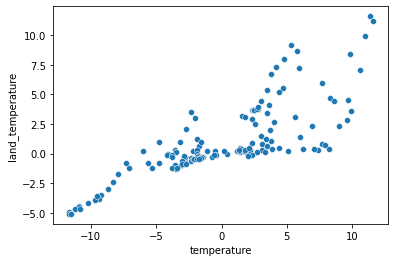

In [9]:
sns.scatterplot(x=df["temperature"], y=df["land_temperature"])
plt.show()

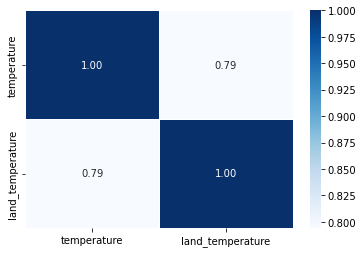

In [10]:
sns.heatmap(data = df.corr(method="pearson"), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [11]:
train, test = train_test_split(df, test_size = 0.2)
print(train, test)

     temperature  land_temperature
59          -4.8               1.0
116          7.9               0.7
97          -3.0              -0.9
47          -9.7              -3.9
78          -3.6              -1.0
..           ...               ...
5            2.8               3.8
126          1.3               0.3
88           2.7               0.1
125          1.8               0.3
81          -0.7              -0.3

[115 rows x 2 columns]      temperature  land_temperature
92          -2.3              -0.6
26           2.3               0.9
106          3.4               1.2
43          -8.3              -2.4
29          -1.4              -0.3
2            2.4               3.7
117          7.1               0.4
112          9.0               2.3
67          -4.1               0.0
58          -6.0               0.2
6            2.7               3.8
23           2.6               2.5
102         -1.6              -0.4
96          -3.4              -1.2
38          -2.7               

In [12]:
X_train = torch.Tensor([[x] for x in list(train.temperature)])
y_train = torch.Tensor([[x] for x in list(train.land_temperature)])

In [14]:
train_data = TensorDataset(X_train, y_train)
print(train_data)

In [16]:
batch_size = len(X_train)
train_dl = DataLoader(train_data, batch_size, shuffle=True)
print(train_dl)

In [17]:
model = nn.Linear(1,1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [21]:
def lrmodel(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            
num_epochs = 1000
lrmodel(num_epochs, model, loss, optimizer, train_dl)

Epoch [1/1000], Loss: 3.3834
Epoch [2/1000], Loss: 3.3833
Epoch [3/1000], Loss: 3.3831
Epoch [4/1000], Loss: 3.3830
Epoch [5/1000], Loss: 3.3828
Epoch [6/1000], Loss: 3.3827
Epoch [7/1000], Loss: 3.3826
Epoch [8/1000], Loss: 3.3824
Epoch [9/1000], Loss: 3.3823
Epoch [10/1000], Loss: 3.3822
Epoch [11/1000], Loss: 3.3820
Epoch [12/1000], Loss: 3.3819
Epoch [13/1000], Loss: 3.3818
Epoch [14/1000], Loss: 3.3816
Epoch [15/1000], Loss: 3.3815
Epoch [16/1000], Loss: 3.3814
Epoch [17/1000], Loss: 3.3812
Epoch [18/1000], Loss: 3.3811
Epoch [19/1000], Loss: 3.3810
Epoch [20/1000], Loss: 3.3809
Epoch [21/1000], Loss: 3.3807
Epoch [22/1000], Loss: 3.3806
Epoch [23/1000], Loss: 3.3805
Epoch [24/1000], Loss: 3.3804
Epoch [25/1000], Loss: 3.3802
Epoch [26/1000], Loss: 3.3801
Epoch [27/1000], Loss: 3.3800
Epoch [28/1000], Loss: 3.3799
Epoch [29/1000], Loss: 3.3797
Epoch [30/1000], Loss: 3.3796
Epoch [31/1000], Loss: 3.3795
Epoch [32/1000], Loss: 3.3794
Epoch [33/1000], Loss: 3.3793
Epoch [34/1000], Lo

Epoch [413/1000], Loss: 3.3560
Epoch [414/1000], Loss: 3.3560
Epoch [415/1000], Loss: 3.3560
Epoch [416/1000], Loss: 3.3559
Epoch [417/1000], Loss: 3.3559
Epoch [418/1000], Loss: 3.3559
Epoch [419/1000], Loss: 3.3559
Epoch [420/1000], Loss: 3.3558
Epoch [421/1000], Loss: 3.3558
Epoch [422/1000], Loss: 3.3558
Epoch [423/1000], Loss: 3.3558
Epoch [424/1000], Loss: 3.3557
Epoch [425/1000], Loss: 3.3557
Epoch [426/1000], Loss: 3.3557
Epoch [427/1000], Loss: 3.3557
Epoch [428/1000], Loss: 3.3556
Epoch [429/1000], Loss: 3.3556
Epoch [430/1000], Loss: 3.3556
Epoch [431/1000], Loss: 3.3556
Epoch [432/1000], Loss: 3.3555
Epoch [433/1000], Loss: 3.3555
Epoch [434/1000], Loss: 3.3555
Epoch [435/1000], Loss: 3.3555
Epoch [436/1000], Loss: 3.3554
Epoch [437/1000], Loss: 3.3554
Epoch [438/1000], Loss: 3.3554
Epoch [439/1000], Loss: 3.3554
Epoch [440/1000], Loss: 3.3553
Epoch [441/1000], Loss: 3.3553
Epoch [442/1000], Loss: 3.3553
Epoch [443/1000], Loss: 3.3553
Epoch [444/1000], Loss: 3.3553
Epoch [4

Epoch [694/1000], Loss: 3.3516
Epoch [695/1000], Loss: 3.3516
Epoch [696/1000], Loss: 3.3516
Epoch [697/1000], Loss: 3.3516
Epoch [698/1000], Loss: 3.3516
Epoch [699/1000], Loss: 3.3516
Epoch [700/1000], Loss: 3.3516
Epoch [701/1000], Loss: 3.3516
Epoch [702/1000], Loss: 3.3516
Epoch [703/1000], Loss: 3.3516
Epoch [704/1000], Loss: 3.3515
Epoch [705/1000], Loss: 3.3515
Epoch [706/1000], Loss: 3.3515
Epoch [707/1000], Loss: 3.3515
Epoch [708/1000], Loss: 3.3515
Epoch [709/1000], Loss: 3.3515
Epoch [710/1000], Loss: 3.3515
Epoch [711/1000], Loss: 3.3515
Epoch [712/1000], Loss: 3.3515
Epoch [713/1000], Loss: 3.3515
Epoch [714/1000], Loss: 3.3515
Epoch [715/1000], Loss: 3.3515
Epoch [716/1000], Loss: 3.3514
Epoch [717/1000], Loss: 3.3514
Epoch [718/1000], Loss: 3.3514
Epoch [719/1000], Loss: 3.3514
Epoch [720/1000], Loss: 3.3514
Epoch [721/1000], Loss: 3.3514
Epoch [722/1000], Loss: 3.3514
Epoch [723/1000], Loss: 3.3514
Epoch [724/1000], Loss: 3.3514
Epoch [725/1000], Loss: 3.3514
Epoch [7

Epoch [989/1000], Loss: 3.3502
Epoch [990/1000], Loss: 3.3502
Epoch [991/1000], Loss: 3.3502
Epoch [992/1000], Loss: 3.3502
Epoch [993/1000], Loss: 3.3502
Epoch [994/1000], Loss: 3.3501
Epoch [995/1000], Loss: 3.3501
Epoch [996/1000], Loss: 3.3501
Epoch [997/1000], Loss: 3.3501
Epoch [998/1000], Loss: 3.3501
Epoch [999/1000], Loss: 3.3501
Epoch [1000/1000], Loss: 3.3501


In [22]:
X_test = torch.Tensor([[x] for x in list(test.temperature)])
preds = model(X_test)
print(preds)

print(float(model.weight))
print(float(model.bias))

tensor([[-0.1323],
        [ 1.9614],
        [ 2.4621],
        [-2.8634],
        [ 0.2773],
        [ 2.0070],
        [ 4.1463],
        [ 5.0111],
        [-0.9517],
        [-1.8165],
        [ 2.1435],
        [ 2.0980],
        [ 0.1863],
        [-0.6330],
        [-0.3144],
        [ 4.4194],
        [-0.4965],
        [-4.1834],
        [ 2.2801],
        [ 1.8704],
        [ 2.6897],
        [ 3.7366],
        [ 1.5973],
        [-4.3199],
        [ 2.8263],
        [ 3.4635],
        [ 3.5545],
        [-1.6344],
        [ 6.1035]], grad_fn=<AddmmBackward0>)
0.4551721513271332
0.9145487546920776


In [23]:
regr = linear_model.LinearRegression()
X = df.temperature.values.reshape(-1,1)
y = df.land_temperature.values.reshape(-1,1)
regr.fit(X,y)
print(regr.coef_[0])
print(regr.intercept_)

[0.46092797]
[0.96593618]
